In [1]:
import os
import sys
from IPython.display import display, clear_output
import tensorflow as tf

sys.path.append(os.path.abspath("../"))
from src.utils import reload_script
from models_src.Support import LRCallback

clear_output(wait=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices)>1:
    tf.config.set_logical_device_configuration(
        physical_devices[0],
        [tf.config.LogicalDeviceConfiguration(memory_limit=9.5*1024)])

In [3]:
# set up databases
config_path = "../exp_lib/general_config/pixel_similarity_dot_shapes.json"
%run -i ../exp_lib/datasets_generators/pixel_similarity_dot_shapes.py {config_path}

I0000 00:00:1742816195.498525     532 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:7c:00.0, compute capability: 8.6


In [4]:
# set up mlflow instance
%run -i ../exp_lib/mlflow/local_experiment.py {cfg.experiment_name}

In [5]:
# set up Trainer
#model_def_path = "../exp_lib/model_def/pixel_similarity_dot/radial_pixel_sim_unet_backboned.json"
model_def_path = "../exp_lib/model_def/pixel_similarity_dot/linear_pixel_sim_unet_backboned.json"
trainer = None
%run -i ../exp_lib/utils/trainer_loader.py {model_def_path}

GridBox(children=(Text(value='carefree-gnat-93', description='run_name', layout=Layout(height='30px', width='3…

Button(description='Pass Parameters', style=ButtonStyle())

GridBox(children=(IntText(value=16, description='color_embs_num', layout=Layout(height='30px', width='300px'),…

Button(description='Accept Parameters', style=ButtonStyle())

Dictionary updated: {'color_embs_num': 16, 'color_embs_mid_layers': 2, 'enc_type': 'linear', 'num_heads': 2, 'embs_dim': 128, 'color_embs_dim': 64, 'size': 32, 'embs_mid_layers': 2, 'dropout': 0.0, 'activation': 'relu', 'attn_mid_layers': 2, 'out_mid_layers': 1, 'attns_num': 3, 'attn_concat_colors': True, 'concat_memory': True, 'concat_colors': True, 'progressive': False, 'inverted_angle': True, 'backbone_def': {'run_name': 'carefree-gnat-93', 'load_mlflow_weights': True, 'load_mode': 'mlflow'}, 'backbone_trainable': False, 'backbone_last_layer': 'Up-Conv_2', 'backbone_init_layer': 'Batch-Normalization', 'name': 'PxRadSimDot'}
carefree-gnat-93 model def already cached
carefree-gnat-93 weights already cached
(None, 1024)
(None, 1024, 1024, 64) (None, 1024, 128)


/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_3', however the 

Model: "PxRadSimDot"
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Conne
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━
│ unet_input (InputLayer)     │ (None, 32, 32, 3)       │              0 │ -    
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Batch-Normalization         │ (None, 32, 32, 3)       │             12 │ unet_
│ (BatchNormalization)        │                         │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_1 (UNetConvBlock) │ [(None, 16, 16, 64),    │         75,648 │ Batch
│                             │ (None, 32, 32, 64)]     │                │      
├─────────────────────────────┼─────────────────────────┼────────────────┼──────
│ Down-Conv_2 (UNetConvBlock) │ [(None, 8, 8, 128),     │        369,024 │ Down-
│      

In [ ]:
trainer.train_model(
    epochs = 15,
    callbacks = [LRCallback(warmup_lr=1e-5, warmup_epochs=1, decay_ratio=0.9)],
    log = True,
    export_final_state = True,
    export_model = False,
    export_model_def = True
)

In [7]:
tf.config.experimental.get_memory_info('GPU:0')['peak']*1e-6

6694.880768

In [13]:
# load model
trainer = None
run_name = 'exultant-shrew-4'
%run -i ../exp_lib/utils/trainer_loader.py --run_name={run_name} --load_weights=1

carefree-gnat-93 model def already cached
carefree-gnat-93 weights already cached
(1, 1024, 1024, 64) (None, 1024, 128)


/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_1', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(
/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'MHA_3', however the 

Model: "PxRadSimDot"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ unet_input (InputLayer)     │ (None, 32, 32, 3)       │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Batch-Normalization         │ (None, 32, 32, 3)       │             12 │ unet_input[0][0]        │
│ (BatchNormalization)        │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Down-Conv_1 (UNetConvBlock) │ [(None, 16, 16, 64),    │         75,648 │ Batch-Normalization[0]… │
│                             │ (None, 32, 32, 64)]     │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Down-Conv_2 (UNetConvBlock) │ [(None, 8, 8, 128),     │        369,024 │ Down-Conv_1[0][0]       │
│                             │ (None, 16, 16, 128)]    │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Down-Conv_3 (UNetConvBlock) │ [(None, 4, 4, 256),     │      1,475,328 │ Down-Conv_2[0][0]       │
│                             │ (None, 8, 8, 256)]      │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Up-Conv_1 (UNetUpConvBlock) │ (None, 16, 16, 128)     │        721,408 │ Down-Conv_3[0][1],      │
│                             │                         │                │ Down-Conv_2[0][1]       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Colors_FFN (FFN)            │ (None, 32, 32, 16)      │          1,712 │ Batch-Normalization[0]… │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Up-Conv_2 (UNetUpConvBlock) │ (None, 32, 32, 64)      │        180,480 │ Up-Conv_1[0][0],        │
│                             │                         │                │ Down-Conv_1[0][1]       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ RSFE                        │ [(None, 1024, 128), (1, │        109,568 │ Up-Conv_2[0][0],        │
│ (RadialSearchFeaturesExtra… │ 1024, 1024, 64)]        │                │ Colors_FFN[0][0]        │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ MHA_1 (SelfRadialMHA)       │ [(None, 1024, 128),     │         49,536 │ RSFE[0][1], RSFE[0][0], │
│                             │ (None, 2, 1024, 1024)]  │                │ RSFE[0][0]              │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Squeeze-Colors (SqueezeImg) │ (None, 1024, 16)        │              0 │ Colors_FFN[0][0]        │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ PostMHA-AddNorm_1 (AddNorm) │ (None, 1024, 128)       │            256 │ RSFE[0][0], MHA_1[0][0] │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ PostMHA-Concat-Colors_1     │ (None, 1024, 144)       │              0 │ Squeeze-Colors[0][0],   │
│ (Concatenate)               │                         │                │ PostMHA-AddNorm_1[0][0] │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ Decoder-FFN_1 (FFN)         │ (None, 1024, 128)       │        135,808 │ PostMHA-Concat-Colors_… │
├─────────────────────────────┼─────────────────────────┼────

 Total params: 3,838,108 (14.64 MB)

 Trainable params: 1,016,208 (3.88 MB)

 Non-trainable params: 2,821,900 (10.76 MB)

None


/home/fzzyfoxx/.local/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 162 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


total F1: 0.9408802
weighted F1: 0.8833255
sample F1: 0.9055216


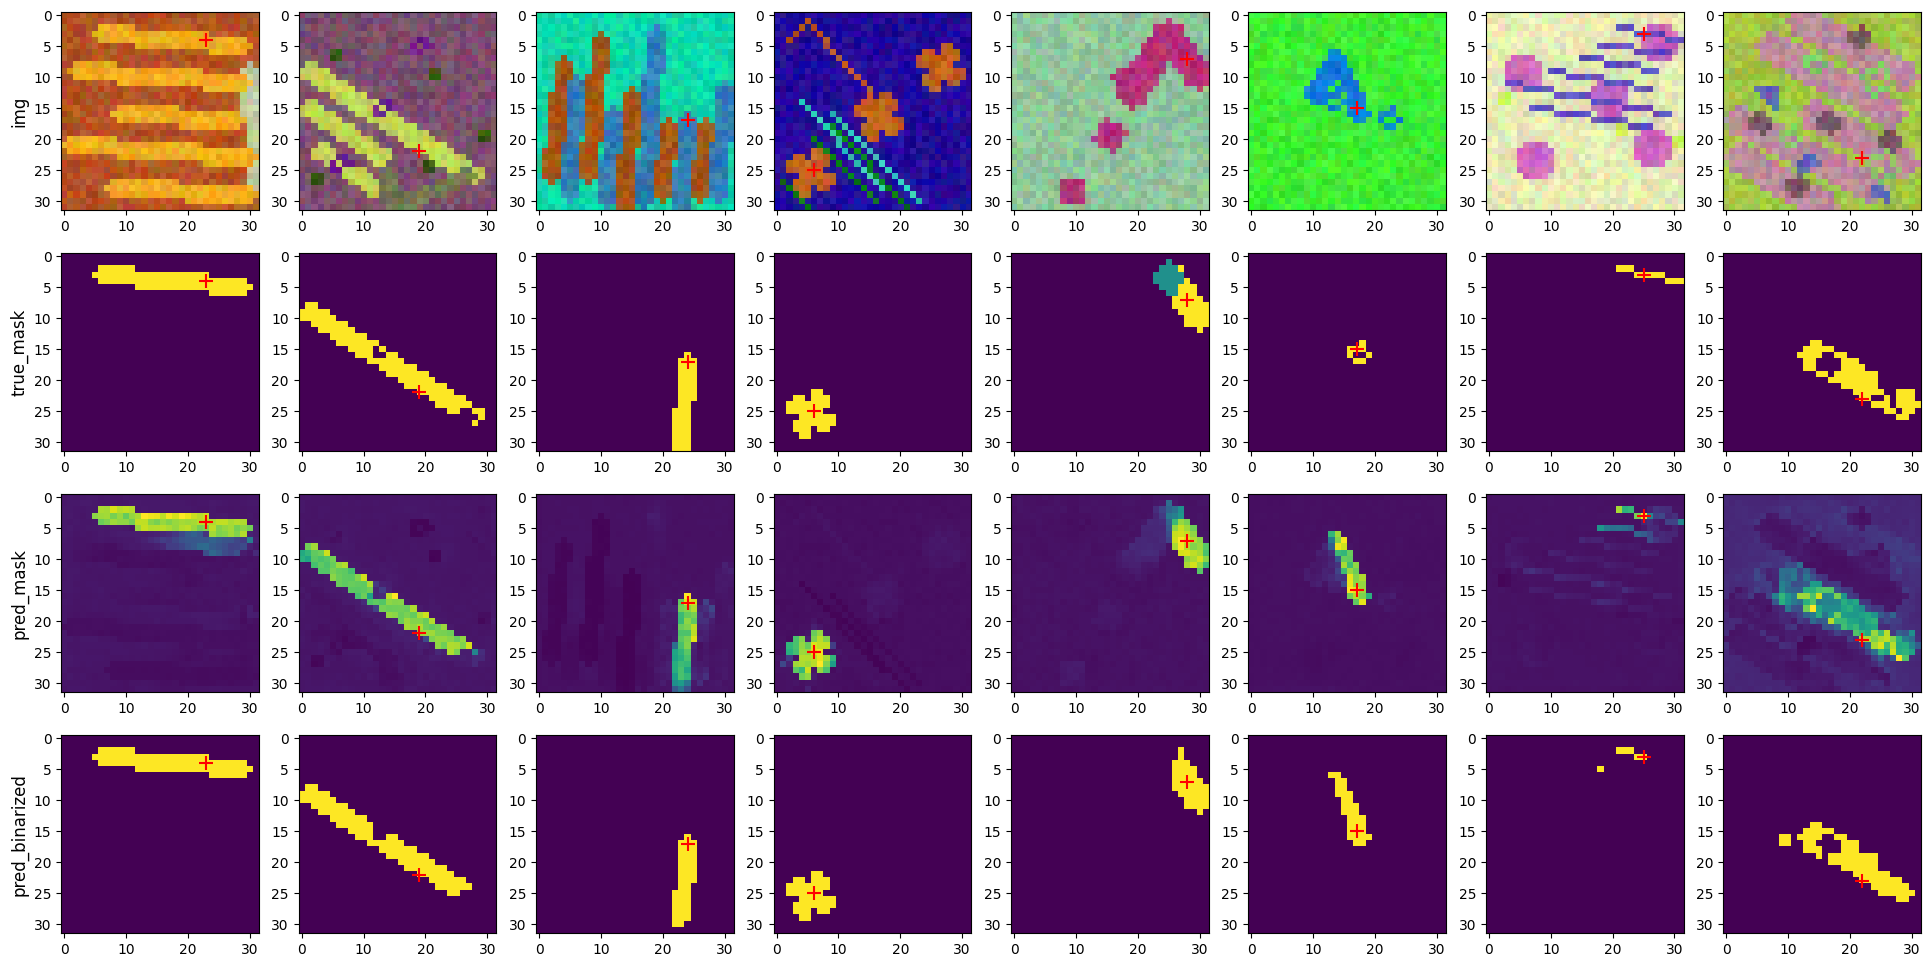

In [18]:
# plot results
%run -i ../exp_lib/plots/pixel_similarity.py --s=8 --next=0